#### Show how scipy.stats can be used to perform a paired samples t-test

### Introduction

##### Paired Sample T-test
The paired sample t-test is also known as the dependent sample t-test, and paired t-test. Furthermore, this type of t-test compares two averages (means) and will give you information if the difference between these two averages are zero. In a paired sample t-test, each participant is measured twice, which results in pairs of observations (the next section will give you an example).

##### Install Python Libaries

In [66]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_rel

The fundamental two-sample t-test is formulated to assess disparities between distinct groups. Occasionally, your focus may shift towards evaluating distinctions between samples sourced from a singular group, but at varying time junctures. As an example, a hospital could contemplate examining the effectiveness of a weight-loss medication by gauging the weights of the same set of patients both prior to and after treatment. In this context, a paired t-test enables the scrutiny of potential discrepancies in the data samples extracted from the same group.

Execution of a paired t-test can be accomplished using of the scipy function stats.ttest_rel(). To illustrate the process, here I will generate fabricated patient weight data and subsequently undertake a paired t-test:

In [54]:
np.random.seed(100)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})



### Check sample of Dataframe

In [55]:
weight_df.head()

,weight_before,weight_after,weight_change
0,197.507036,187.733780,-9.773256
1,260.280412,253.349107,-6.931305
2,284.591074,268.474497,-16.116577
3,242.426919,241.343505,-1.083414
4,279.439624,276.945180,-2.494443


### Check a summary of the data

In [56]:
weight_df.describe()             

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,246.875024,245.273794,-1.601231
std,29.239138,28.860282,5.347108
min,175.385454,182.016288,-16.116577
25%,224.578491,224.637324,-4.794257
50%,248.904910,246.617406,-1.980166
75%,270.287894,266.937200,2.271459
max,311.038227,310.899838,10.243270


The summary shows that patients lost about 1.23 pounds on average after treatment. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level:

In [57]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.9945735001280593, pvalue=0.003471639955998896)

### Type I and Type II Error
The outcome of a statistical hypothesis test and deciding whether to accept or reject the null hypothesis isn't foolproof. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence. The evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.

Type I error is when you wrongly reject the null hypothesis when it's actually true. It's like a "false positive" or a "false hit." The rate of type I errors is linked to the significance level α. So, if you set a higher confidence level, you're less likely to get a false positive.

Type II error is when you wrongly fail to reject the null hypothesis when it's actually false. It's a "false negative" or a "miss." The higher your confidence level, the highter the propensity there is for committing a type II errors.

Let's look at these errors with a plot:

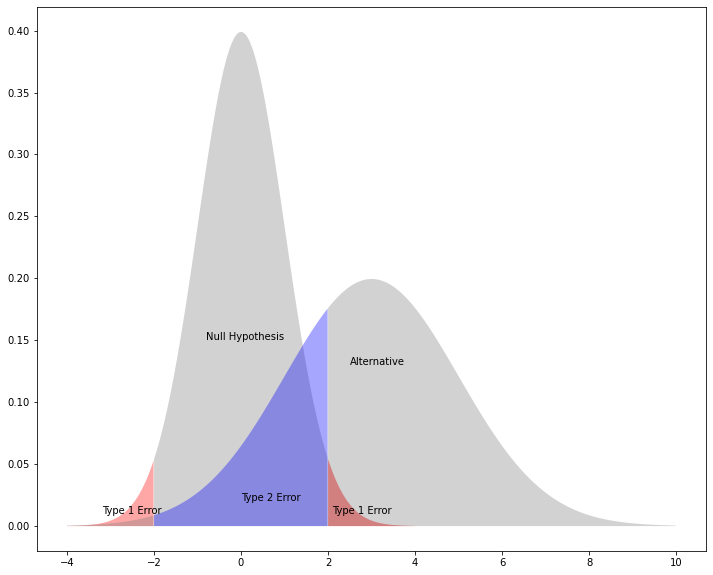

In [58]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");


In the provided graph, the shaded regions in red signify instances of type I errors under the assumption that the alternative hypothesis is not divergent from the null hypothesis. This pertains to a two-sided test conducted with a 95% confidence level.

Contrastingly, the blue-shaded region depicts type II errors. These arise when the alternative hypothesis deviates from the null hypothesis, as exemplified by the distribution on the right-hand side. It's worth noting that the Type II error rate corresponds to the portion beneath the alternative distribution, situated within the quantiles defined by the null distribution and the established confidence level. Calculating the specific type II error rate for the given distributions involves the following steps:

In [59]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323

With the normal distributions above, we'd fail to reject the null hypothesis about 30% of the time because the distributions are close enough together that they have significant overlap.

### Part 2
##### Find an appropriate data set online or elsewhere on which to perform a paired samples t-test. Demonstrate how to perform a t-test on the data set.


The dataset I am using to demonstrate how to investigate a sample of data from patients, of different ages and sex, of their blood pressure before and after they had recieved treatment.  
First I will investigate the dataset.  

In [94]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


So from this I can see there are 5 columns includes information about 120 patients' sex, age group, and blood pressure measurements before and after some intervention.  

In [95]:
# Sample of the data
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [96]:
# Info on the data set
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


From the sample and information illustrated by the describe function we can gather some insights about the data distribution for the 'bp_before' and 'bp_after' columns, which represent blood pressure measurements before and after the intervention. For example:  
 - The average (mean) blood pressure before the intervention is higher (153.875) compared to after the intervention (145.458).
 - The standard deviation for 'bp_before' (9.208) is larger than for 'bp_after' (14.382), indicating more variability in the 'bp_before' measurements.
 - The range of blood pressure measurements is larger for 'bp_before' (140 to 185) compared to 'bp_after' (125 to 185).
 - The median (50th percentile) blood pressure before and after the intervention is 152.5 and 145, respectively.  
 
These summary statistics provide an overview of the tendency and spread of the blood pressure measurements in the dataset. However if I want to investigate the data further and draw insightes from the subgenres of data within the dataset I will need to use some analytic tools - such as the t-test

### T-Test Male vs Female (Paired T-Test)

This code will be using the ttest_ind function from a python statistics library (SciPy) to perform a paired sample t-test. It is comparing the blood pressure measurements after the intervention for male patients and female patients.

The function takes two arrays as inputs, which are the blood pressure measurements after the intervention for males and females.

In [93]:
stats.ttest_rel(df['bp_after'][df['sex'] == 'Male'],
                df['bp_after'][df['sex'] == 'Female'])

Ttest_relResult(statistic=3.6585471539918433, pvalue=0.000542628348948253)

### Interpreting the result:

Since the p-value (0.000543) is very small (much smaller than 0.05), there is strong evidence to reject the null hypothesis. This suggests that there is a statistically significant difference in blood pressure measurements after the intervention between male and female patients.

The result indicates that there is a significant difference in the effect of the intervention on blood pressure between male and female patients. The positive test statistic value (3.66) suggests that the mean blood pressure after the intervention is significantly higher for male patients compared to female patients.


### Digging deeper  (Paired t-Test)
Here we will now use the python libraries to dissect and investigate the data further.  
I will begin by looking at the Male patients.  

#### Male: before and after treatment  


##### What am I planning on testing?  
From the dataframe I will create a pandas Series named 'a' containing the blood pressure measurements before the intervention for male patients. It filters the DataFrame to include only rows where the 'sex' column is "Male" and selects the 'bp_before' column.

Similarly I will create another pandas Series named 'b' containing the blood pressure measurements after the intervention for male patients.

Then, using the ttest_rel function from a statistical library (SciPy). The 'a' and 'b' Series are provided as inputs. The ttest_rel function calculates the paired t-test statistic and p-value for the two sets of blood pressure measurements.

In [84]:
a = df.query ('sex == "Male"') ['bp_before']
b = df.query ('sex == "Male"') ['bp_after']

ttest_rel(a,b)

Ttest_relResult(statistic=1.5431395990169743, pvalue=0.12814399772772275)

### Interpreting the result:
Since the p-value (0.128) is greater than a typical significance level like 0.05, there isn't strong evidence to reject the null hypothesis. This suggests that, based on the data and the paired-sample t-test, you may not have found a statistically significant difference in blood pressure measurements before and after the intervention for male patients.  

### Comparison of the results

##### Ttest_indResult (Independent Two-Sample T-Test):  
The small p-value indicates strong evidence to reject the null hypothesis. This suggests that there is a statistically significant difference in blood pressure measurements after the intervention between male and female patients. The positive test statistic suggests that the mean blood pressure after the intervention is significantly higher for males compared to females.  To me this could lead me to a number of possible assumptions.
 1. The treatment is affecting women by lowering their blood pressure and not effecting their male counterparts.  
 2. The treatment is affecting men by raising their blood pressure and not effecting their female counterparts. 
 3. The treatment is affecting men by raising their blood pressure and treatment is affecting women by lowering their blood pressure

##### Ttest_relResult (Paired-Sample T-Test):
The p-value (0.128) is greater than a typical significance level like 0.05. This suggests that there isn't strong evidence to reject the null hypothesis, and I may not have found a statistically significant difference in blood pressure measurements before and after the intervention for male patients. This would lead me to believe that asswumption 1 above "The treatment is affecting women by lowering their blood pressure and not effecting their male counterparts." is correct.

The p-value for the Independent Two-Sample T-Test is much smaller (0.0011) than the p-value for the Paired-Sample T-Test (0.128).
This indicates that the evidence against the null hypothesis is much stronger in the Independent Two-Sample T-Test.
In the Independent Two-Sample T-Test, the small p-value suggests that the difference in blood pressure measurements after the intervention between male and female patients is statistically significant.
In the Paired-Sample T-Test, the higher p-value suggests that the difference in blood pressure measurements before and after the intervention for male patients is not statistically significant.
I believe this is a good example as it shows the choice of which test to use (independent vs. paired) depends on the research question and the nature of the data. In this case, the Independent Two-Sample T-Test was used to compare two different groups (male and female) and the Paired-Sample T-Test was used to compare measurements within the same group (before and after intervention for male patients). The significant difference found in the Independent Two-Sample T-Test does not necessarily imply a significant difference in the Paired-Sample T-Test.


### Prove my assumption
Here I will perform a Paired-Sample T-Test using the ttest_rel function on the 'bp_before' and 'bp_after' data for female patients. to see if there is a statistically significant difference in blood pressure measurements before and after the intervention for female patients.

In [87]:
c = df.query ('sex == "Female"') ['bp_before']
d = df.query ('sex == "Female"') ['bp_after']

ttest_rel(c,d)

Ttest_relResult(statistic=3.4767481886426155, pvalue=0.0009590729491960203)

Since the p-value (0.000959) is very small (much smaller than 0.05), there is strong evidence to reject the null hypothesis. This suggests that there is a statistically significant difference in blood pressure measurements before and after the intervention for female patients.

In other words, the result indicates that the intervention has had a significant effect on blood pressure for female patients. The positive test statistic value (3.48) suggests that the mean blood pressure after the intervention is significantly higher for female patients.

Comparing to the previous results:

The p-value for this Paired-Sample T-Test (0.000959) is smaller than the p-value for the previous Independent Two-Sample T-Test (0.001093).
Both of these p-values are very small, indicating strong evidence of significant differences.
Overall, the new Paired-Sample T-Test result for female patients reinforces the finding of a significant difference in blood pressure measurements before and after the intervention, specifically for female patients.